In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
iris = load_iris()
X = iris.data[:,:2]
y = iris.target

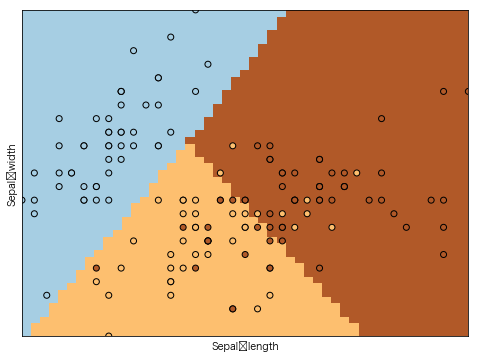

In [3]:
lr = LogisticRegression(C=1e5, multi_class='ovr', solver='lbfgs')
lr.fit(X,y)
x1_min, x1_max = X[:,0].min(), X[:,0].max()
x2_min, x2_max = X[:,1].min(), X[:,1].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min,x1_max), np.linspace(x2_min,x2_max))
Z = lr.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)
plt.figure(1, figsize=(8,6))
plt.pcolormesh(xx1, xx2, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.xticks(())
plt.yticks(())
plt.show()

In [4]:
import glob
import numpy as np

In [5]:
def features_and_label(path, train=True, attack=False):
    if train:
        fileList = glob.glob(path + '*.txt')
        featuresList_train = []
        for file in fileList:
            featuresList_train.append(' '.join(np.loadtxt(file).astype('int').astype('str')))
        label_train = [0] * len(fileList)
        return featuresList_train, label_train
    if attack:
        fileList = glob.glob(path + '*.txt')
        featuresList_attack = []
        for file in fileList:
            featuresList_attack.append(' '.join(np.loadtxt(file).astype('int').astype('str'))) 
        label_attack = [1] * len(fileList)
        return featuresList_attack, label_attack

In [6]:
normal, normal_label = features_and_label('./数据集/ADFA-LD/Training_Data_Master/')
attack, attack_label = features_and_label('./数据集/ADFA-LD/Attack_Data_Master/Java_Meterpreter_*/', train=False, attack=True)

countvec = CountVectorizer()
X = countvec.fit_transform(normal + attack)
y = normal_label + attack_label

X_train, X_val, y_train, y_val = train_test_split(X, y)

lr = LogisticRegression(solver='sag', C=1e5, max_iter=10000)
lr.fit(X_train, y_train)
lr.score(X_val, y_val)

0.9625

In [7]:
cross_val_score(lr, X, y, cv=10).mean()

0.9602720880810274

In [8]:
from keras.datasets import mnist

Using TensorFlow backend.


In [10]:
mnist_train, mnist_test = mnist.load_data()
X_train = mnist_train[0].reshape(60000, 28 * 28)
X_test = mnist_test[0].reshape(10000, 28 * 28)

In [ ]:
lr = LogisticRegression(solver='saga', C=1e5, max_iter=10000, multi_class='ovr')
lr.fit(X_train, mnist_train[1])
lr.score(X_test, mnist_test[1])

In [ ]:
cross_val_score(lr, X_train, mnist_train[1], cv=10, scoring='accuracy').mean()